Useful 
   * http://pandas.pydata.org/pandas-docs/stable/10min.html
   * http://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/
   * http://bconnelly.net/2013/10/summarizing-data-in-python-with-pandas/ for understanding groupby

Have used web page at https://dwoll.shinyapps.io/DVHshiny/ to upload all dvh text files and queried to get desired metrics which are downloaded as a comma seperated text file, rename extension .csv.


For all available structures I export the following metrics


    D2%, D5%, D50%, D95%, D99%, D1cc,  D0.1cc, DMAX, DSD, DRX, DHI, V5Gy, V12.5Gy, V20Gy, V30Gy , V40Gy, V50Gy,  V55Gy  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
AAA_df = pd.read_csv('AAA_metrics.csv')  # import AAA data
Dm_df = pd.read_csv('Dm_metrics.csv')  
#Dw_df = pd.read_csv('Dw_metrics.csv')  # dont analyse for time being

In [3]:
#with pd.option_context('display.precision', 10):
 #   print (AAA_df)   # to check precision

parse patID to get Case

In [4]:
AAA_df['Case'] = AAA_df['patID'].str.split('_').str.get(0)  # get the case ID e.g. case1
AAA_df = AAA_df.drop('patID', 1)                            # drop patID
AAA_df.rename(columns={'observed': 'AAA'}, inplace=True)    # rename 
AAA_df.head()

,AAA,metric,structure,Case
0,10.623986,D2%,Heart,Case1
1,9.220632,D5%,Heart,Case1
2,1.546204,D50%,Heart,Case1
3,0.152595,D95%,Heart,Case1
4,0.111391,D99%,Heart,Case1


In [5]:
Dm_df['Case'] = Dm_df['patID'].str.split('_').str.get(0)
Dm_df = Dm_df.drop('patID', 1)
Dm_df.rename(columns={'observed': 'Dm'}, inplace=True)    # rename 
Dm_df.head()

,Dm,metric,structure,Case
0,25.685894,D2%,BODY,Case1
1,14.388797,D5%,BODY,Case1
2,0.399853,D50%,BODY,Case1
3,0.065952,D95%,BODY,Case1
4,0.022860,D99%,BODY,Case1


Check which metrics have I exported

In [6]:
print (AAA_df.Case.unique())
print ("The number of unique patients is " + str(len((AAA_df.Case.unique() ))))
print (AAA_df.metric.unique())
print ("The number of unique metrics is " + str(len((AAA_df.metric.unique() ))))
print (AAA_df.structure.unique())
print ("The number of unique structures is " + str(len((AAA_df.structure.unique() ))))

['Case1' 'Case11' 'Case12' 'Case13' 'Case14' 'Case16' 'Case17' 'Case18'
 'Case22' 'Case23' 'Case25' 'Case30' 'Case31' 'Case32']
The number of unique patients is 14
['D2%' 'D5%' 'D50%' 'D95%' 'D99%' 'D1CC' 'D0.1CC' 'DMAX' 'DSD' 'DRX' 'DHI'
 'V5GY' 'V12.5GY' 'V20GY' 'V30GY' 'V40GY' 'V50GY' 'V55GY']
The number of unique metrics is 18
['Heart' 'Foramen' 'Oesophagus' 'Trachea' 'L Brachial plex'
 'Rt Brachial plex' 'PTV CHEST' 'Lt_Lung' 'Rt_Lung' 'Both Lungs-ITV' 'skin'
 'ribs' 'R Brachial plex' 'Both Lungs' 'Ribs']
The number of unique structures is 15


In [7]:
AAA_poss_entries = len(AAA_df.structure.unique()) * len((AAA_df.metric.unique() ))  * len((AAA_df.Case.unique() ))
print("total possible number of entries is " + str(AAA_poss_entries))
print("the actual number of AAA entries is " + str(len(AAA_df)))
print("the actual number of Dm entries is " + str(len(Dm_df)))
#print("the actual number of Dw entries is " + str(len(Dw_df)))

total possible number of entries is 3780
the actual number of AAA entries is 2754
the actual number of Dm entries is 4068


Not all structures were exported in some cases due to the manual process so number of AAA and Dm entries differ. Need to keep only entries which are common

In [8]:
AAA_df_groupby_structure = AAA_df[AAA_df['metric'] == 'D50%'].groupby([ 'structure'])
#AAA_df_groupby_structure = AAA_df.groupby([ 'structure', 'metric'])
AAA_df_groupby_structure.AAA.count()

structure
Both Lungs           5
Both Lungs-ITV      12
Foramen             13
Heart               14
L Brachial plex     14
Lt_Lung             14
Oesophagus          14
PTV CHEST           14
R Brachial plex     10
Ribs                 4
Rt Brachial plex     1
Rt_Lung             14
Trachea             13
ribs                10
skin                 1
Name: AAA, dtype: int64

In [9]:
# AAA_df[AAA_df['structure'] == 'Lt Lung']

In [10]:
Dm_df_groupby_structure = Dm_df[Dm_df['metric'] == 'D50%'].groupby([ 'structure'])
#AAA_df_groupby_structure = AAA_df.groupby([ 'structure', 'metric'])
Dm_df_groupby_structure.Dm.count()

structure
Airway avoidance     3
BODY                 4
Both Lungs           5
Both Lungs-ITV      13
Bronchial tree      14
CONTRAST             2
Dose 100[%]          3
Dose 50[%]           5
Foramen             13
Foramen+3mm         13
GTV                  1
Heart               14
ITV                  3
Inner Ring           3
L Brachial plex     14
Lt_Lung             14
Oesophagus          14
PTV CHEST           14
PTV ring 2-3cm       3
Pseudo ITV           3
PseudoPTV-ITV        3
R Brachial plex     12
Ribs                 5
Ribs-PTV             4
Rt Brachial plex     1
Rt_Lung             14
Skin                 3
Skin-PTV+2cm         3
Trachea             14
ribs                 9
Name: Dm, dtype: int64

Export Heart, PTV chest, Oesophagus, Rt_Lung to new datafram

In [11]:
struct_list = ['PTV CHEST','Heart','Oesophagus','Rt_Lung', 'Lt_Lung', 'Both Lungs', 'L Brachial plex', 'Foramen']
AAA_Dm_data = pd.DataFrame()  # create an empty dataframe we will put all data into
counter = 0

for structure in struct_list:
    AAA_data = AAA_df[AAA_df['structure'] == structure]
    Dm_data = Dm_df[Dm_df['structure'] == structure]
    AAA_Dm_temp = pd.merge(AAA_data, Dm_data, how='inner', on=['metric', 'Case', 'structure'])  # Get merged set
    AAA_Dm_temp = AAA_Dm_temp[['Case', 'structure', 'metric', 'AAA', 'Dm']]   # rearrange    
    if counter == 0:
        AAA_Dm_data = AAA_Dm_temp
    else:    
        AAA_Dm_data = AAA_Dm_data.append(AAA_Dm_temp)
    counter = counter +1

AAA_Dm_data.head()

,Case,structure,metric,AAA,Dm
0,Case1,PTV CHEST,D2%,70.006151,69.599396
1,Case1,PTV CHEST,D5%,69.602983,69.044564
2,Case1,PTV CHEST,D50%,65.560826,65.457641
3,Case1,PTV CHEST,D95%,57.272270,56.747946
4,Case1,PTV CHEST,D99%,55.580473,54.672556


In [12]:
Dm_df.Case.unique()

array(['Case1', 'Case11', 'Case12', 'Case13', 'Case14', 'Case16', 'Case17',
       'Case18', 'Case22', 'Case23', 'Case25', 'Case30', 'Case31', 'Case32'], dtype=object)

Calc % difference

In [13]:
def pct_diff(calc, ref):
    return 100.0*(calc - ref)/ref
    
AAA_Dm_data['Diff%'] = pct_diff(AAA_Dm_data.AAA, AAA_Dm_data.Dm)
AAA_Dm_data.fillna(0.0)
AAA_Dm_data.head()

,Case,structure,metric,AAA,Dm,Diff%
0,Case1,PTV CHEST,D2%,70.006151,69.599396,0.584424
1,Case1,PTV CHEST,D5%,69.602983,69.044564,0.808781
2,Case1,PTV CHEST,D50%,65.560826,65.457641,0.157638
3,Case1,PTV CHEST,D95%,57.272270,56.747946,0.923953
4,Case1,PTV CHEST,D99%,55.580473,54.672556,1.660645


In [14]:
# Check structures 
AAA_Dm_data_groupby_structure = AAA_Dm_data[AAA_Dm_data['metric'] == 'D2%'].groupby(['structure'])
AAA_Dm_data_groupby_structure.count()

,Case,metric,AAA,Dm,Diff%
structure,,,,,
Both Lungs,5,5,5,5,5
Foramen,13,13,13,13,13
Heart,14,14,14,14,14
L Brachial plex,14,14,14,14,14
Lt_Lung,14,14,14,14,14
Oesophagus,14,14,14,14,14
PTV CHEST,14,14,14,14,14
Rt_Lung,14,14,14,14,14


In [15]:
AAA_Dm_data.fillna(0.0).to_csv('AAA_Dm_data.csv', index=False)  # write to file

END

In [181]:
import random
test_metric = random.choice(data.metric.unique())
test_structure = random.choice(data.structure.unique())
test_case = random.choice(data.Case.unique())

AAA_test =  AAA_df[(AAA_df['metric'] == test_metric) & (AAA_df['structure'] == test_structure) & (AAA_df['Case'] == test_case)]
print(AAA_test.AAA)

Dm_test =  Dm_df[(Dm_df['metric'] == test_metric) & (Dm_df['structure'] == test_structure) & (Dm_df['Case'] == test_case)]
print(Dm_test.Dm)

data_test = data[(data['metric'] == test_metric) & (data['structure'] == test_structure) & (data['Case'] == test_case)]
print(data_test)

1775    17.875
Name: AAA, dtype: float64
1826    18.04
Name: Dm, dtype: float64
        Case structure metric     AAA     Dm
1486  Case22     Heart   DMAX  17.875  18.04


Some strcuture appear more than once per case, e.g. Case31  Skin-PTV+2cm

Get code for BA plot from http://stackoverflow.com/questions/16399279/bland-altman-plot-in-python

In [135]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Difference (%)')

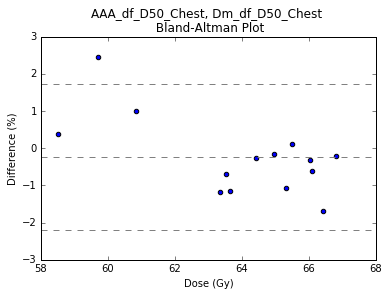

In [139]:
bland_altman_plot(AAA_df_D50_Chest, Dm_df_D50_Chest)
plt.title('AAA_df_D50_Chest, Dm_df_D50_Chest \n Bland-Altman Plot')
plt.show()